In [84]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

## Initializing the dataset

In [85]:
df = pd.read_csv('../dataset/long_beach_dataset.csv')
df.head()

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Age,Intake Date,Intake Condition,...,Intake Subtype,Reason for Intake,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive
0,A414780,HAPPY,CAT,ORANGE,WHITE,Neutered,2010-04-25,13.0,2021-09-08,NORMAL,...,OTC,NaN,2021-12-15,"3900 BLK FALCON AVE, LONG BEACH, CA 90807",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1
1,A458315,PELE,CAT,ORANGE,NaN,Spayed,2010-06-28,13.0,2018-10-21,NORMAL,...,OTC,DIVORCE,2019-01-23,"800 LINDEN AVE, LONG BEACH, CA 90813",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1
2,A510845,MITZIE,CAT,TRICOLOR,NaN,Spayed,2012-09-28,11.0,2021-08-04,NORMAL,...,OTC,OWNER PROB,2021-08-21,"2600 BLK EUCALYPTUS AVE, LONG BEACH, CA 90806",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1
3,A516312,BELL,CAT,BLACK,NaN,Spayed,2013-05-12,10.0,2017-01-18,FERAL,...,OTC,ALLERGIC,2017-02-19,"1300 E HARDING ST, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WALKIN,Alive on Intake,False,1
4,A556069,SNOW,CAT,FLAME PT,NaN,Neutered,2014-06-01,9.0,2022-06-04,NORMAL,...,OTC,NaN,2022-07-22,"5400 BLK LEMON AVE, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1


In [86]:
# renaming columns title

# Use the rename method with a dictionary to specify the new column names
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head()

,animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,age,intake_date,intake_condition,...,intake_subtype,reason_for_intake,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,intake_is_dead,outcome_is_dead,was_outcome_alive
0,A414780,HAPPY,CAT,ORANGE,WHITE,Neutered,2010-04-25,13.0,2021-09-08,NORMAL,...,OTC,NaN,2021-12-15,"3900 BLK FALCON AVE, LONG BEACH, CA 90807",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1
1,A458315,PELE,CAT,ORANGE,NaN,Spayed,2010-06-28,13.0,2018-10-21,NORMAL,...,OTC,DIVORCE,2019-01-23,"800 LINDEN AVE, LONG BEACH, CA 90813",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1
2,A510845,MITZIE,CAT,TRICOLOR,NaN,Spayed,2012-09-28,11.0,2021-08-04,NORMAL,...,OTC,OWNER PROB,2021-08-21,"2600 BLK EUCALYPTUS AVE, LONG BEACH, CA 90806",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1
3,A516312,BELL,CAT,BLACK,NaN,Spayed,2013-05-12,10.0,2017-01-18,FERAL,...,OTC,ALLERGIC,2017-02-19,"1300 E HARDING ST, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WALKIN,Alive on Intake,False,1
4,A556069,SNOW,CAT,FLAME PT,NaN,Neutered,2014-06-01,9.0,2022-06-04,NORMAL,...,OTC,NaN,2022-07-22,"5400 BLK LEMON AVE, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1


# Data cleaning begins here (round 1)

### Calculating days stayed value

In [87]:
df['days_stayed'] = (pd.to_datetime(df['outcome_date'], format='%Y/%m/%d') - pd.to_datetime(df['intake_date'], format='%Y/%m/%d')).dt.days.fillna(-1).astype(int)
df.head()

,animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,age,intake_date,intake_condition,...,reason_for_intake,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,intake_is_dead,outcome_is_dead,was_outcome_alive,days_stayed
0,A414780,HAPPY,CAT,ORANGE,WHITE,Neutered,2010-04-25,13.0,2021-09-08,NORMAL,...,NaN,2021-12-15,"3900 BLK FALCON AVE, LONG BEACH, CA 90807",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1,98
1,A458315,PELE,CAT,ORANGE,NaN,Spayed,2010-06-28,13.0,2018-10-21,NORMAL,...,DIVORCE,2019-01-23,"800 LINDEN AVE, LONG BEACH, CA 90813",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1,94
2,A510845,MITZIE,CAT,TRICOLOR,NaN,Spayed,2012-09-28,11.0,2021-08-04,NORMAL,...,OWNER PROB,2021-08-21,"2600 BLK EUCALYPTUS AVE, LONG BEACH, CA 90806",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1,17
3,A516312,BELL,CAT,BLACK,NaN,Spayed,2013-05-12,10.0,2017-01-18,FERAL,...,ALLERGIC,2017-02-19,"1300 E HARDING ST, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WALKIN,Alive on Intake,False,1,32
4,A556069,SNOW,CAT,FLAME PT,NaN,Neutered,2014-06-01,9.0,2022-06-04,NORMAL,...,NaN,2022-07-22,"5400 BLK LEMON AVE, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1,48


### Creating new dataset for visualization with required columns only

***Observation: 'primary_color', 'sex', 'age', 'intake_condition', 'days_stayed' are the columns we need for our data model, so we will only select those***

In [88]:
selected_columns = ['primary_color', 'sex', 'age', 'intake_condition', 'intake_type' , 'days_stayed']
selected_df = df[selected_columns]
selected_df = selected_df.dropna(subset=['age', 'days_stayed'])

In [89]:
print(selected_df_without_nan['age'].isna().sum())
print(selected_df_without_nan['days_stayed'].isna().sum())

0
0


## check for duplicate values

In [90]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(selected_df.duplicated().sum())

164


In [91]:
# Check for duplicated rows considering all columns
duplicated_rows = selected_df.duplicated(keep=False)

# Print the rows that are duplicated
print("Duplicated Rows:")
print(selected_df[duplicated_rows])

Duplicated Rows:
     primary_color       sex  age intake_condition intake_type  days_stayed
6            BLACK    Female  7.0           NORMAL       STRAY           16
15          CALICO    Female  6.0           NORMAL       STRAY           12
22       BRN TABBY    Female  6.0           NORMAL       STRAY            8
26           BLACK  Neutered  6.0           NORMAL       STRAY           75
27       BRN TABBY    Female  6.0           NORMAL       STRAY           23
...            ...       ...  ...              ...         ...          ...
2993         BLACK    Spayed  4.0           NORMAL       STRAY           12
2998         BLACK  Neutered  1.0         ILL MILD       STRAY           10
3027          GRAY    Spayed  1.0           NORMAL       STRAY            3
3031         BLACK    Spayed  2.0           NORMAL       STRAY           52
3045          GRAY    Spayed  1.0           NORMAL       STRAY            9

[310 rows x 6 columns]


In [92]:
selected_df= selected_df.drop_duplicates(keep='first')

In [93]:
# Recheck the number of duplicate rows we have in our dataframe.
print(selected_df.duplicated().sum())

0


## check null values

In [94]:
# 1. Print the number of null rows we have in our dataframe.
print(selected_df.isnull().sum())

primary_color       0
sex                 0
age                 0
intake_condition    0
intake_type         0
days_stayed         0
dtype: int64


# Data ploting and visualization begins here

### Graphing individual columns

In [95]:
# our working dataframe
selected_df['age'] = selected_df['age'].astype(int)
selected_df.head()

,primary_color,sex,age,intake_condition,intake_type,days_stayed
0,ORANGE,Neutered,13,NORMAL,STRAY,98
1,ORANGE,Spayed,13,NORMAL,OWNER SURRENDER,94
2,TRICOLOR,Spayed,11,NORMAL,OWNER SURRENDER,17
3,BLACK,Spayed,10,FERAL,OWNER SURRENDER,32
4,FLAME PT,Neutered,9,NORMAL,OWNER SURRENDER,48


In [96]:
# checking the shape of our new dataset
print(selected_df.shape)

(2871, 6)


## Analysing primary_color column & ploting bar plot

In [117]:
color_category_counts = selected_df['primary_color'].value_counts()
color_category_counts

BLACK         744
BRN TABBY     416
GRAY          330
GRAY TABBY    261
WHITE         219
ORG TABBY     212
CALICO        122
ORANGE        116
TORTIE         90
SEAL PT        57
LYNX PT        25
BROWN          25
TORTIE DIL     25
CALICO TAB     23
CRM TABBY      22
CALICO DIL     18
CREAM          16
CHOC PT        16
TAN            14
TRICOLOR       14
SNOWSHOE       13
FLAME PT       12
BLK TABBY      11
BLK SMOKE       9
BLUE PT         6
TORBI           5
BLUE            5
LC LYNX PT      5
S-T PT          4
LI LYNX PT      4
SLVR TABBY      4
UNKNOWN         4
GRAY TIGER      3
BRN TIGER       3
CREAM PT        2
LILAC PT        2
YELLOW          2
SILVER          2
SEAL            2
PINK            1
CHOCOLATE       1
BUFF            1
L-C PT          1
TORTIE PT       1
CRM TIGER       1
BR BRINDLE      1
ORG TIGER       1
Name: primary_color, dtype: int64

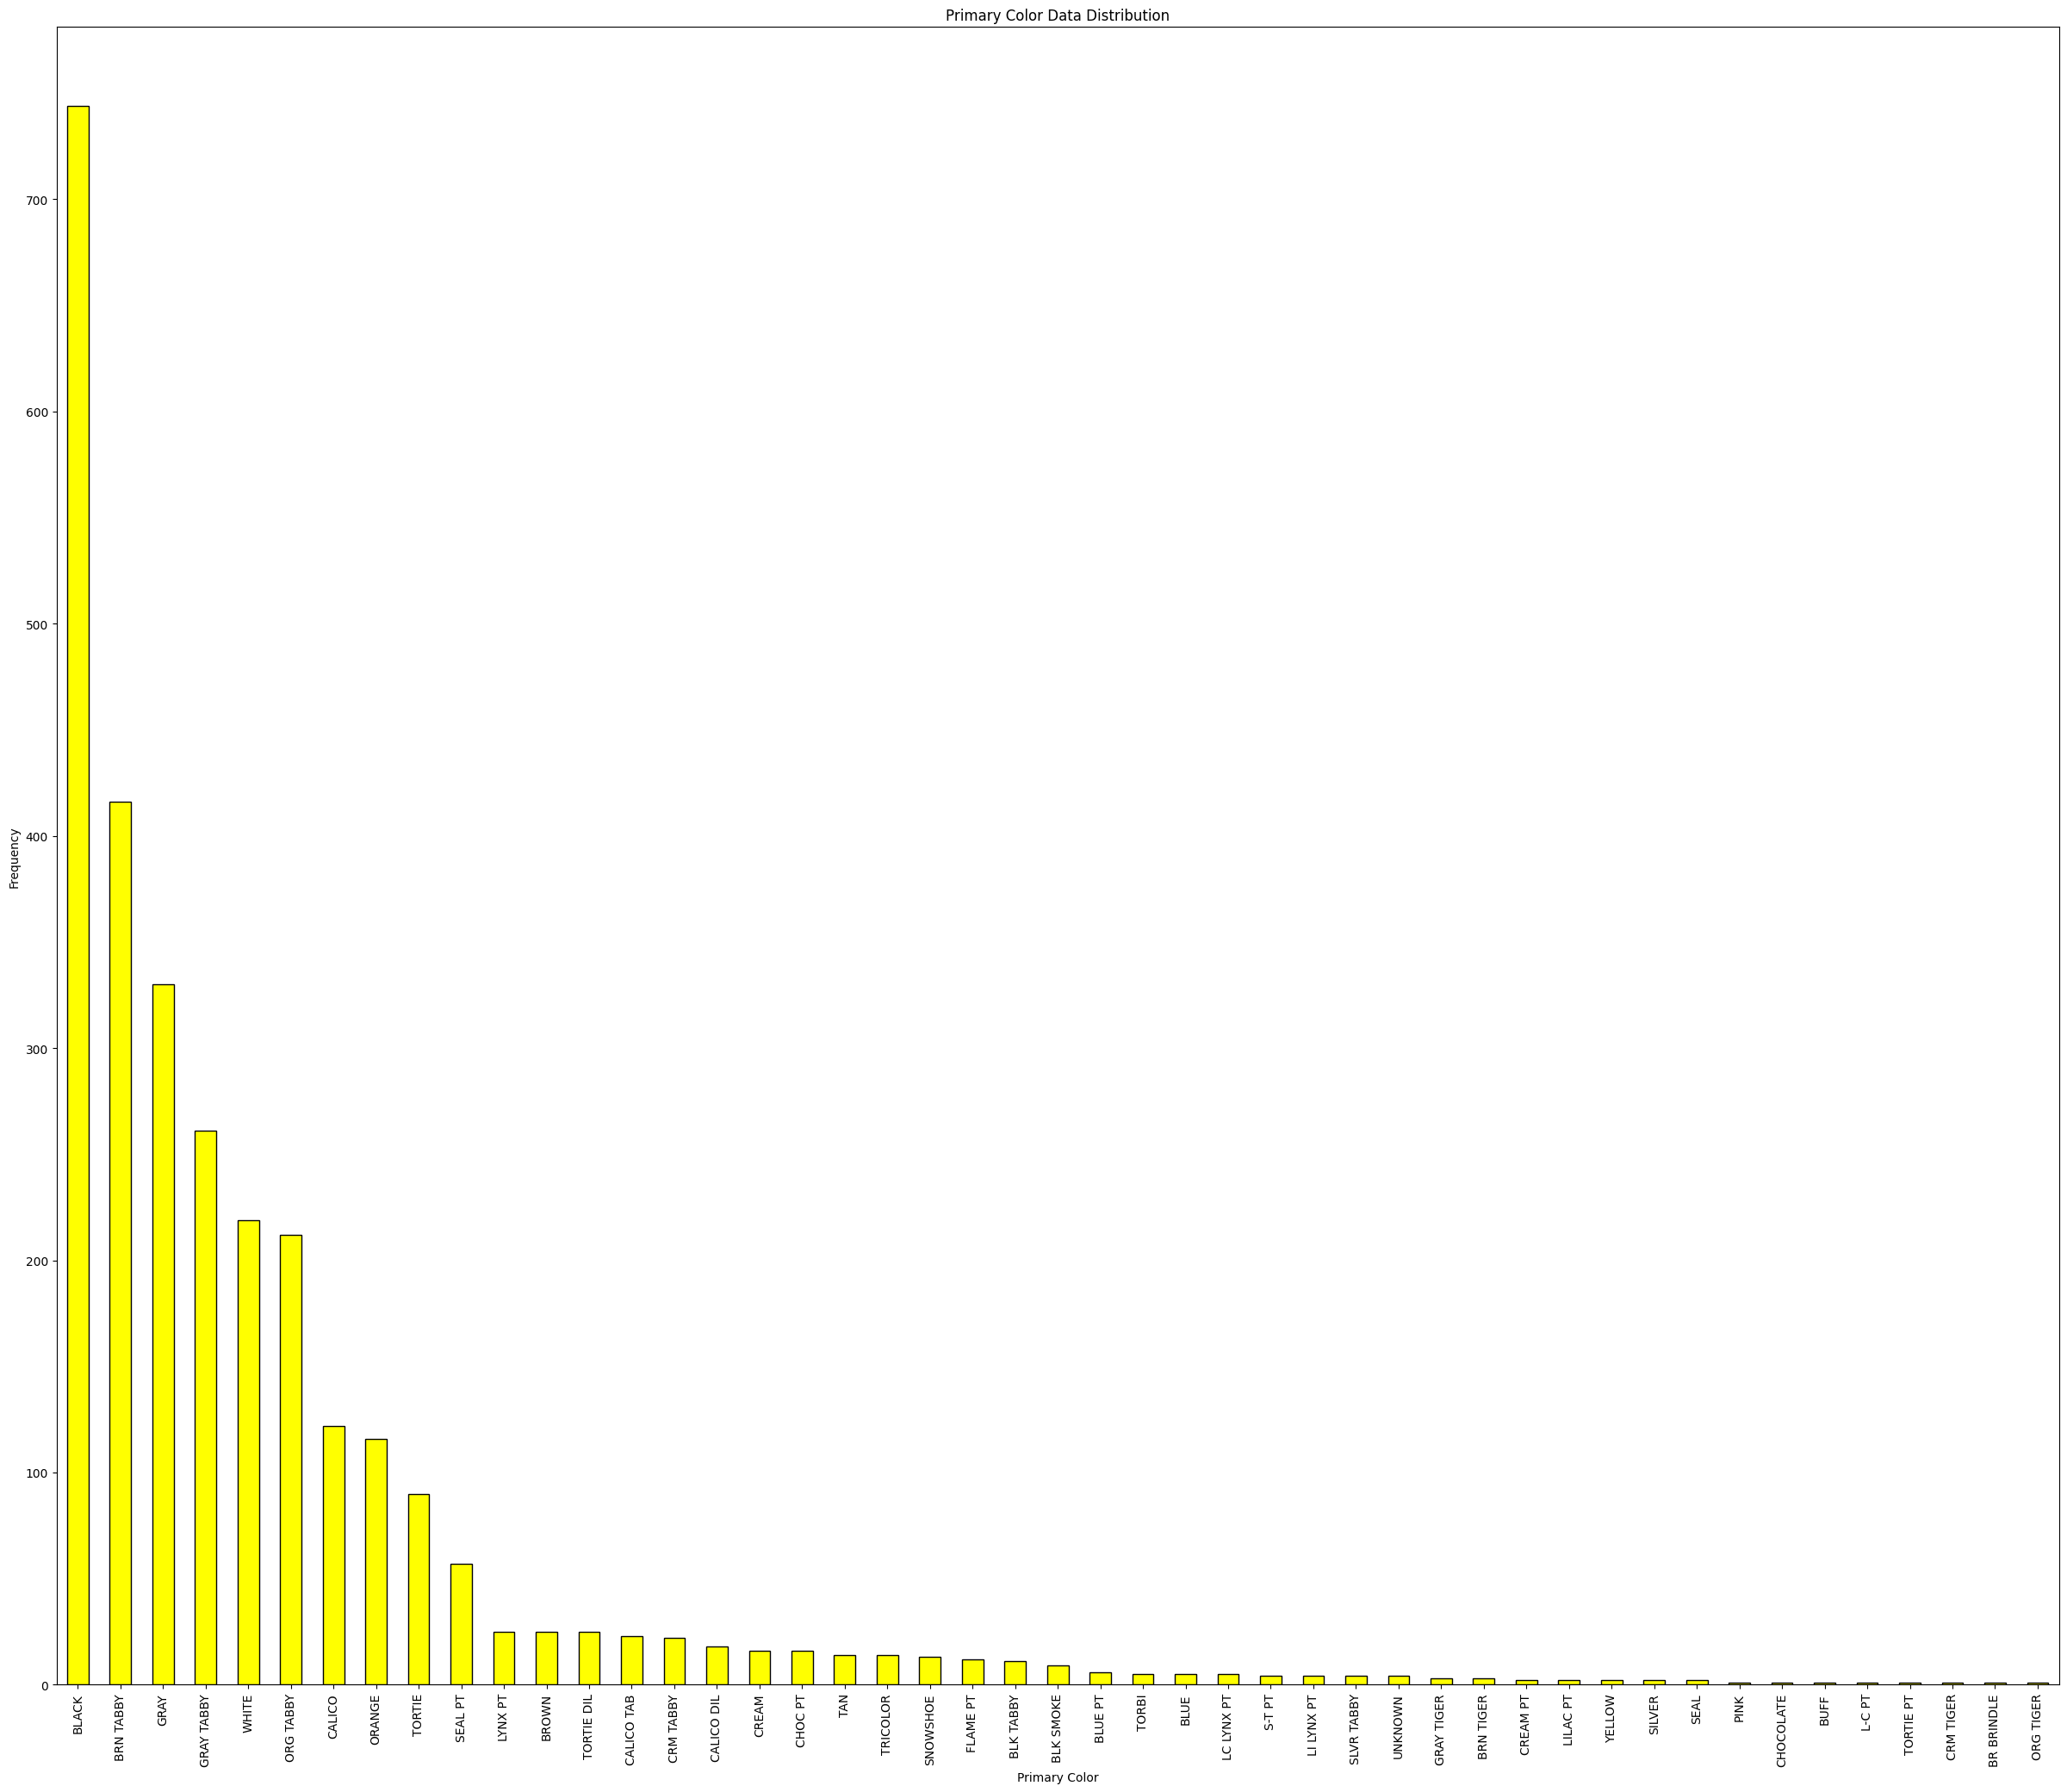

In [118]:
color_category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Primary Color')
plt.ylabel('Frequency')
plt.title('Primary Color Data Distribution')

# Display the plot
plt.show()

## Data cleaning for 'primary_color'

### Simplifing the color categories

**we can see here we have about 32 different colors and most of them has very low frequency, so we will reduce the number of category by assigning to common categories**

In [100]:
def assign_color(input_string):
    if 'TABBY' in input_string or 'TAB' in input_string:
        return 'TABBY'
    elif 'BLACK' in input_string:
        return 'BLACK'
    elif 'WHITE' in input_string:
        return 'WHITE'
    elif 'GRAY' in input_string:
        return 'GRAY'
    else:
        return 'OTHER'

selected_df['simplified_color'] = selected_df['primary_color'].apply(assign_color)

selected_df.head()

,primary_color,sex,age,intake_condition,intake_type,days_stayed,simplified_color
0,ORANGE,Neutered,13,NORMAL,STRAY,98,OTHER
1,ORANGE,Spayed,13,NORMAL,OWNER SURRENDER,94,OTHER
2,TRICOLOR,Spayed,11,NORMAL,OWNER SURRENDER,17,OTHER
3,BLACK,Spayed,10,FERAL,OWNER SURRENDER,32,BLACK
4,FLAME PT,Neutered,9,NORMAL,OWNER SURRENDER,48,OTHER


In [119]:
color_category_counts2 = selected_df['simplified_color'].value_counts()
color_category_counts2

TABBY    949
BLACK    744
OTHER    626
GRAY     333
WHITE    219
Name: simplified_color, dtype: int64

## Data visualization after cleaning for 'color'

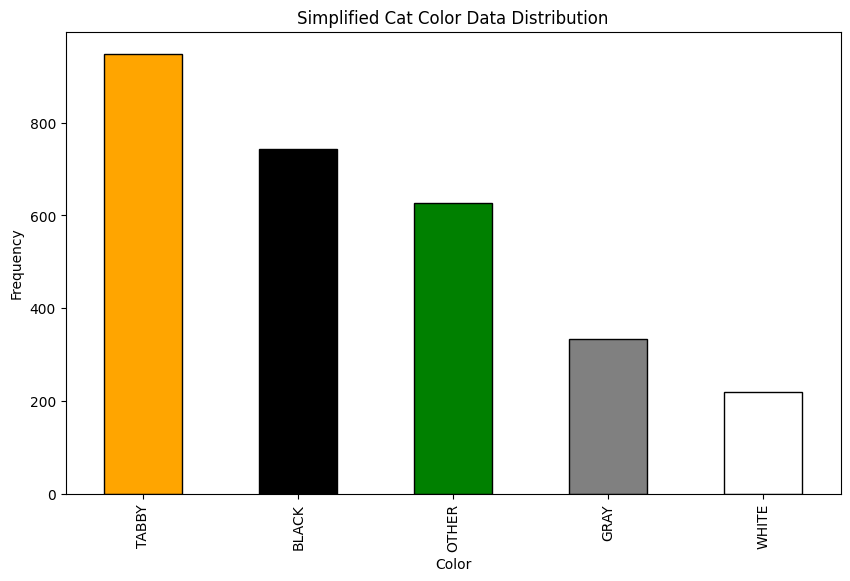

In [120]:
import matplotlib.pyplot as plt

# Assuming category_counts2 is your Series
color_category_counts2 = pd.Series({'TABBY': 949, 'BLACK': 744, 'OTHER': 626, 'GRAY': 333, 'WHITE': 219})

# Create a color dictionary for each category
color_dict = {'TABBY': 'orange', 'BLACK': 'black', 'OTHER': 'green', 'GRAY': 'gray', 'WHITE': 'white'}

# Plot the bar chart with specified colors
color_category_counts2.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in category_counts2.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Color Data Distribution')

# Display the plot
plt.show()


## Analysing 'sex' column & ploting bar plot

In [121]:
sex_category_counts = selected_df['sex'].value_counts()
sex_category_counts

Neutered    1248
Spayed      1201
Female       212
Male         205
Unknown        5
Name: sex, dtype: int64

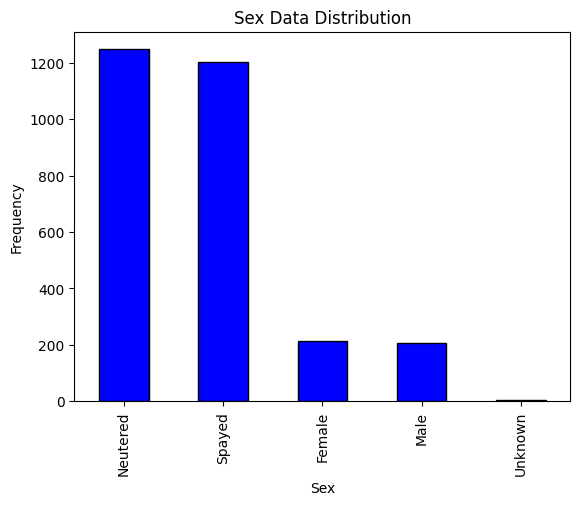

In [116]:
# ploting bar plot for sex column

category_counts = selected_df['sex'].value_counts()
category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

In [ ]:
def assign_sex(input_string):
    if 'MALE' in input_string:
        return 'TABBY'
    elif 'BLACK' in input_string:
        return 'BLACK'
    elif 'WHITE' in input_string:
        return 'WHITE'
    elif 'GRAY' in input_string:
        return 'GRAY'
    else:
        return 'OTHER'

selected_df['simplified_color'] = selected_df['primary_color'].apply(assign_color)

selected_df.head()

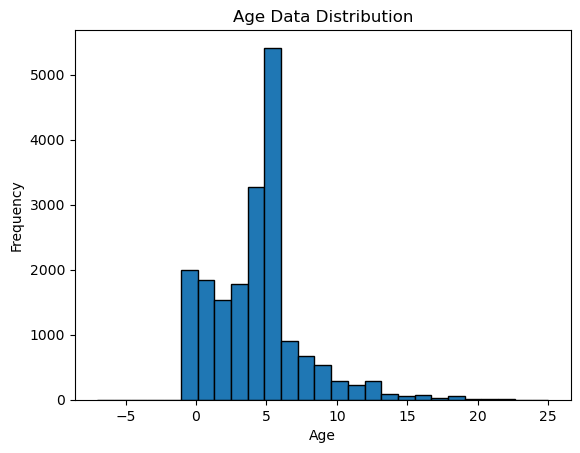

In [145]:
# ploting bar plot for age column
selected_df['Age'].plot(bins=27, kind='hist', edgecolor='black')

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Data Distribution')

# # Display the plot
plt.show()

**Here we see histogram has outliers on both end and we need to remove these outliers for the sake of accurate prediction**

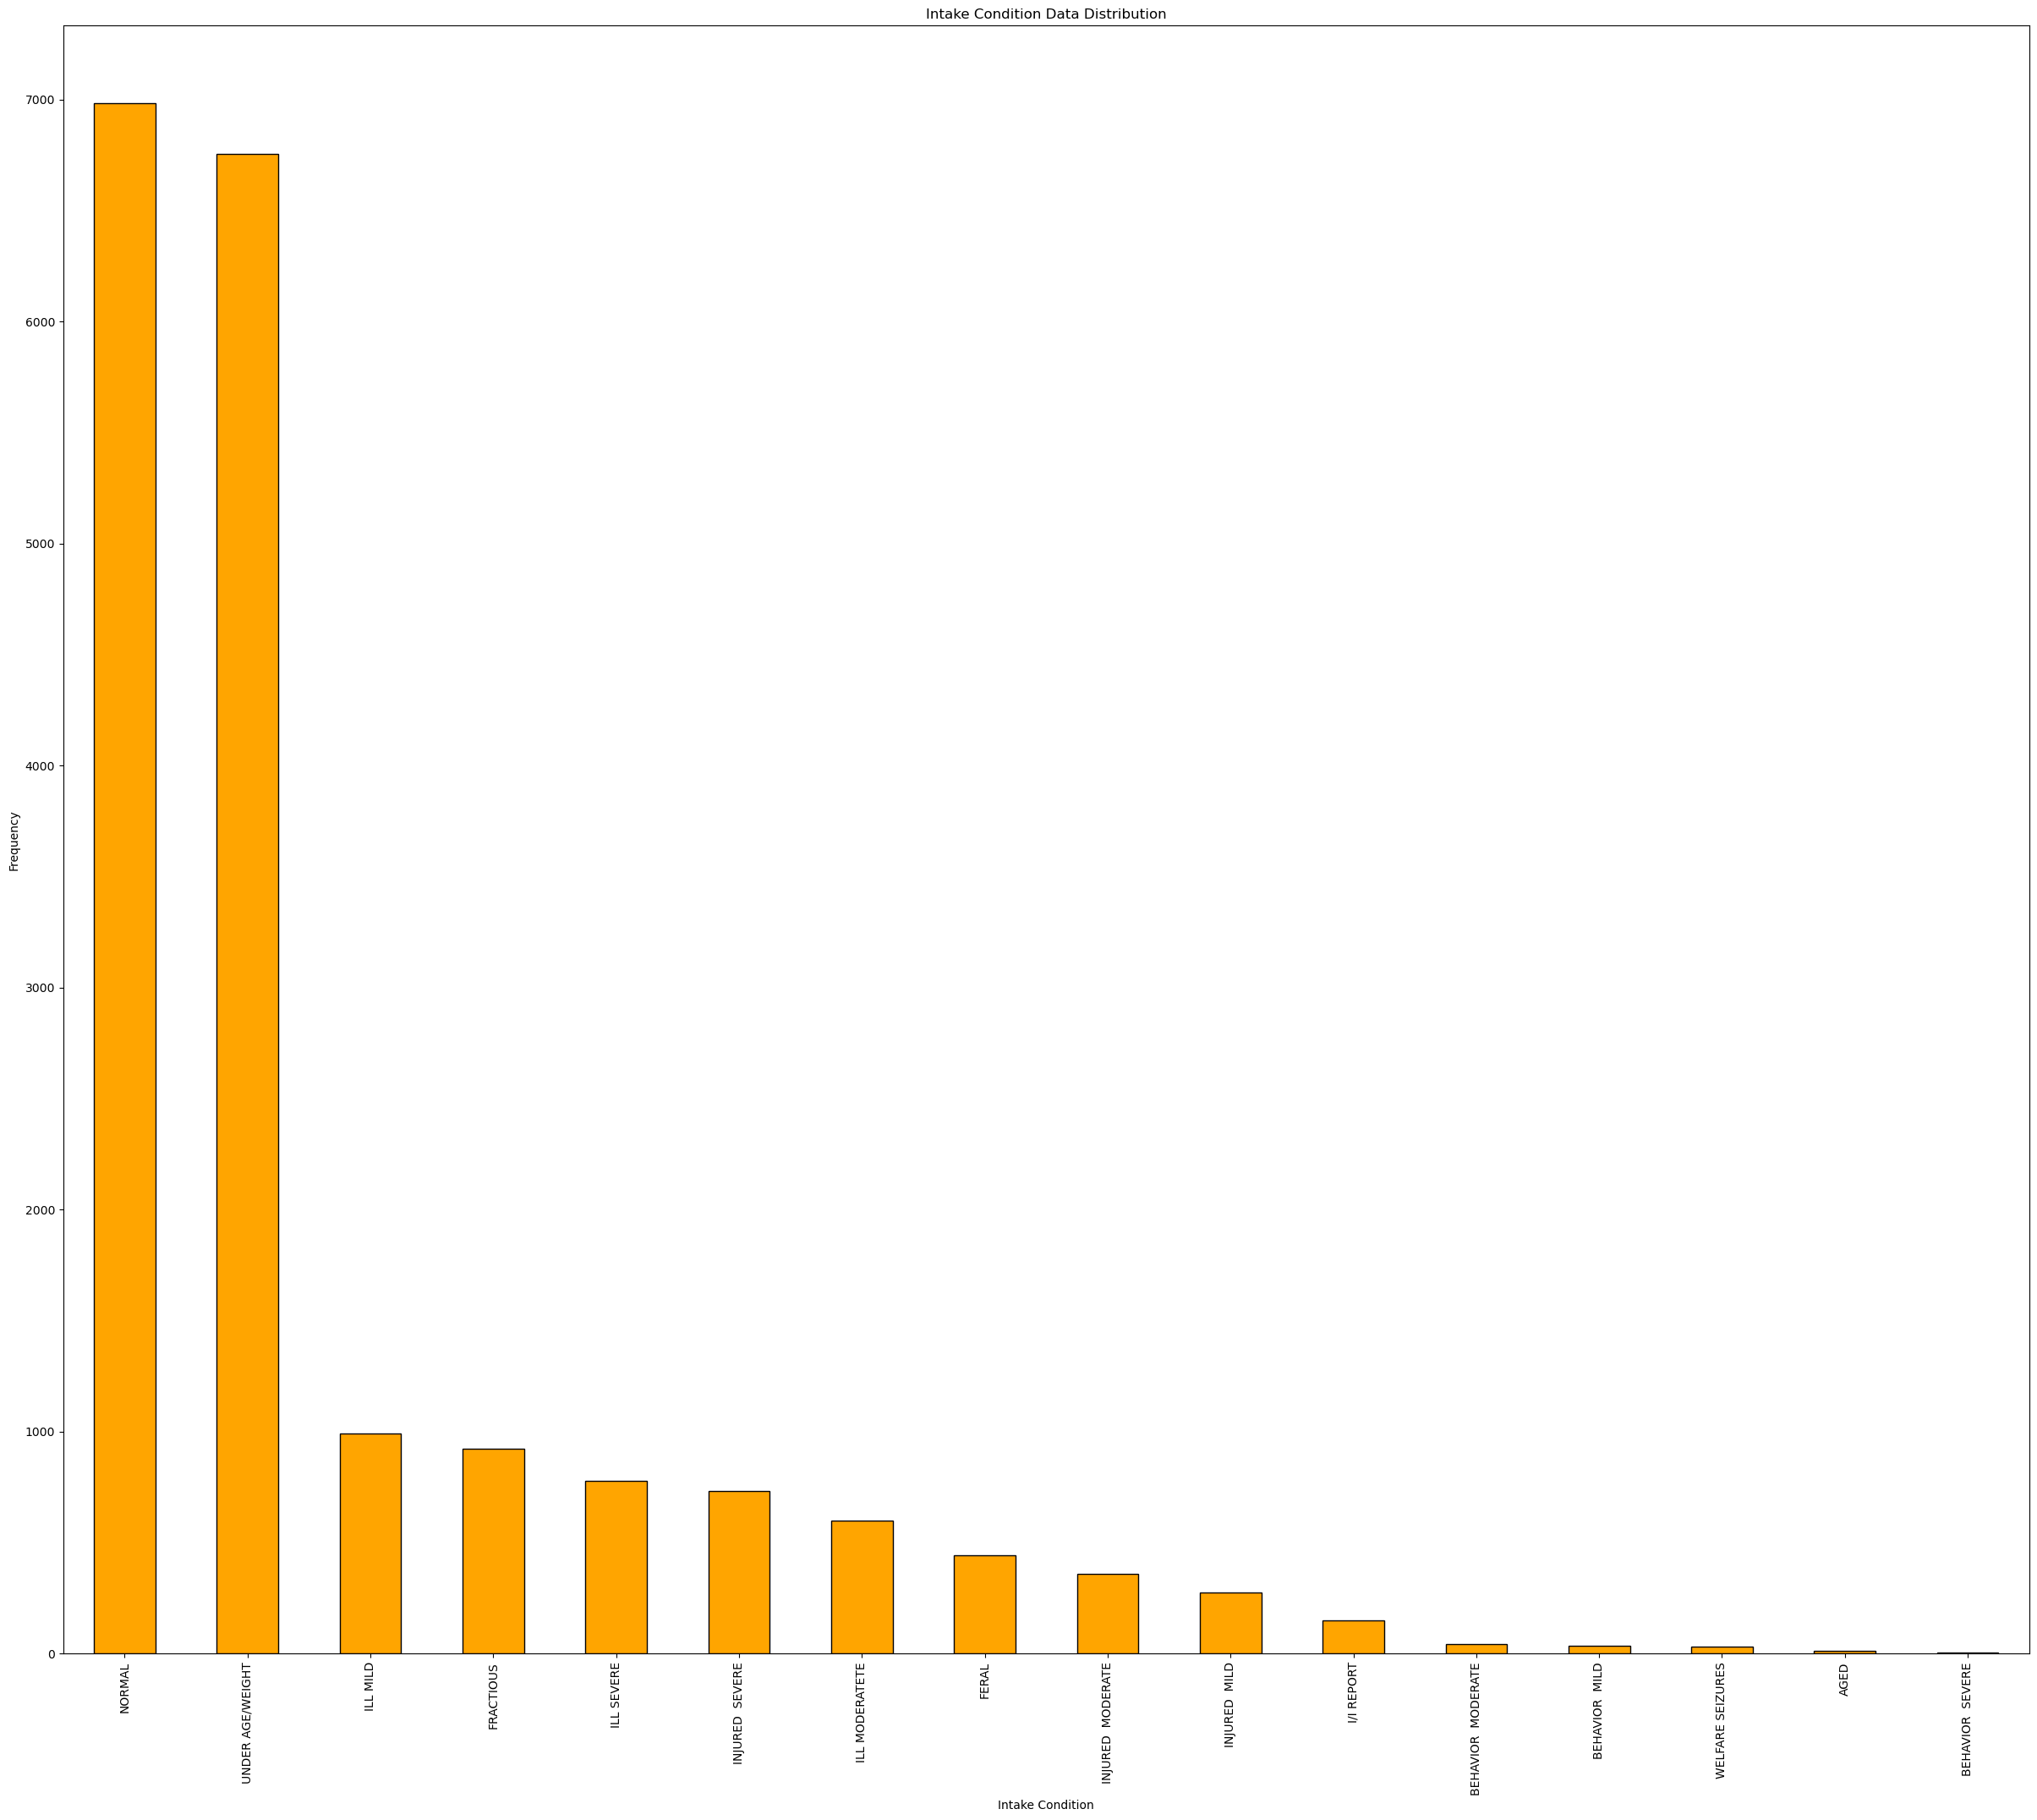

In [146]:
# ploting bar plot for Intake_Condition column
category_counts = selected_df['Intake_Condition'].value_counts()
category_counts.plot(kind='bar', color='orange', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Intake Condition Data Distribution')

# Display the plot
plt.show()

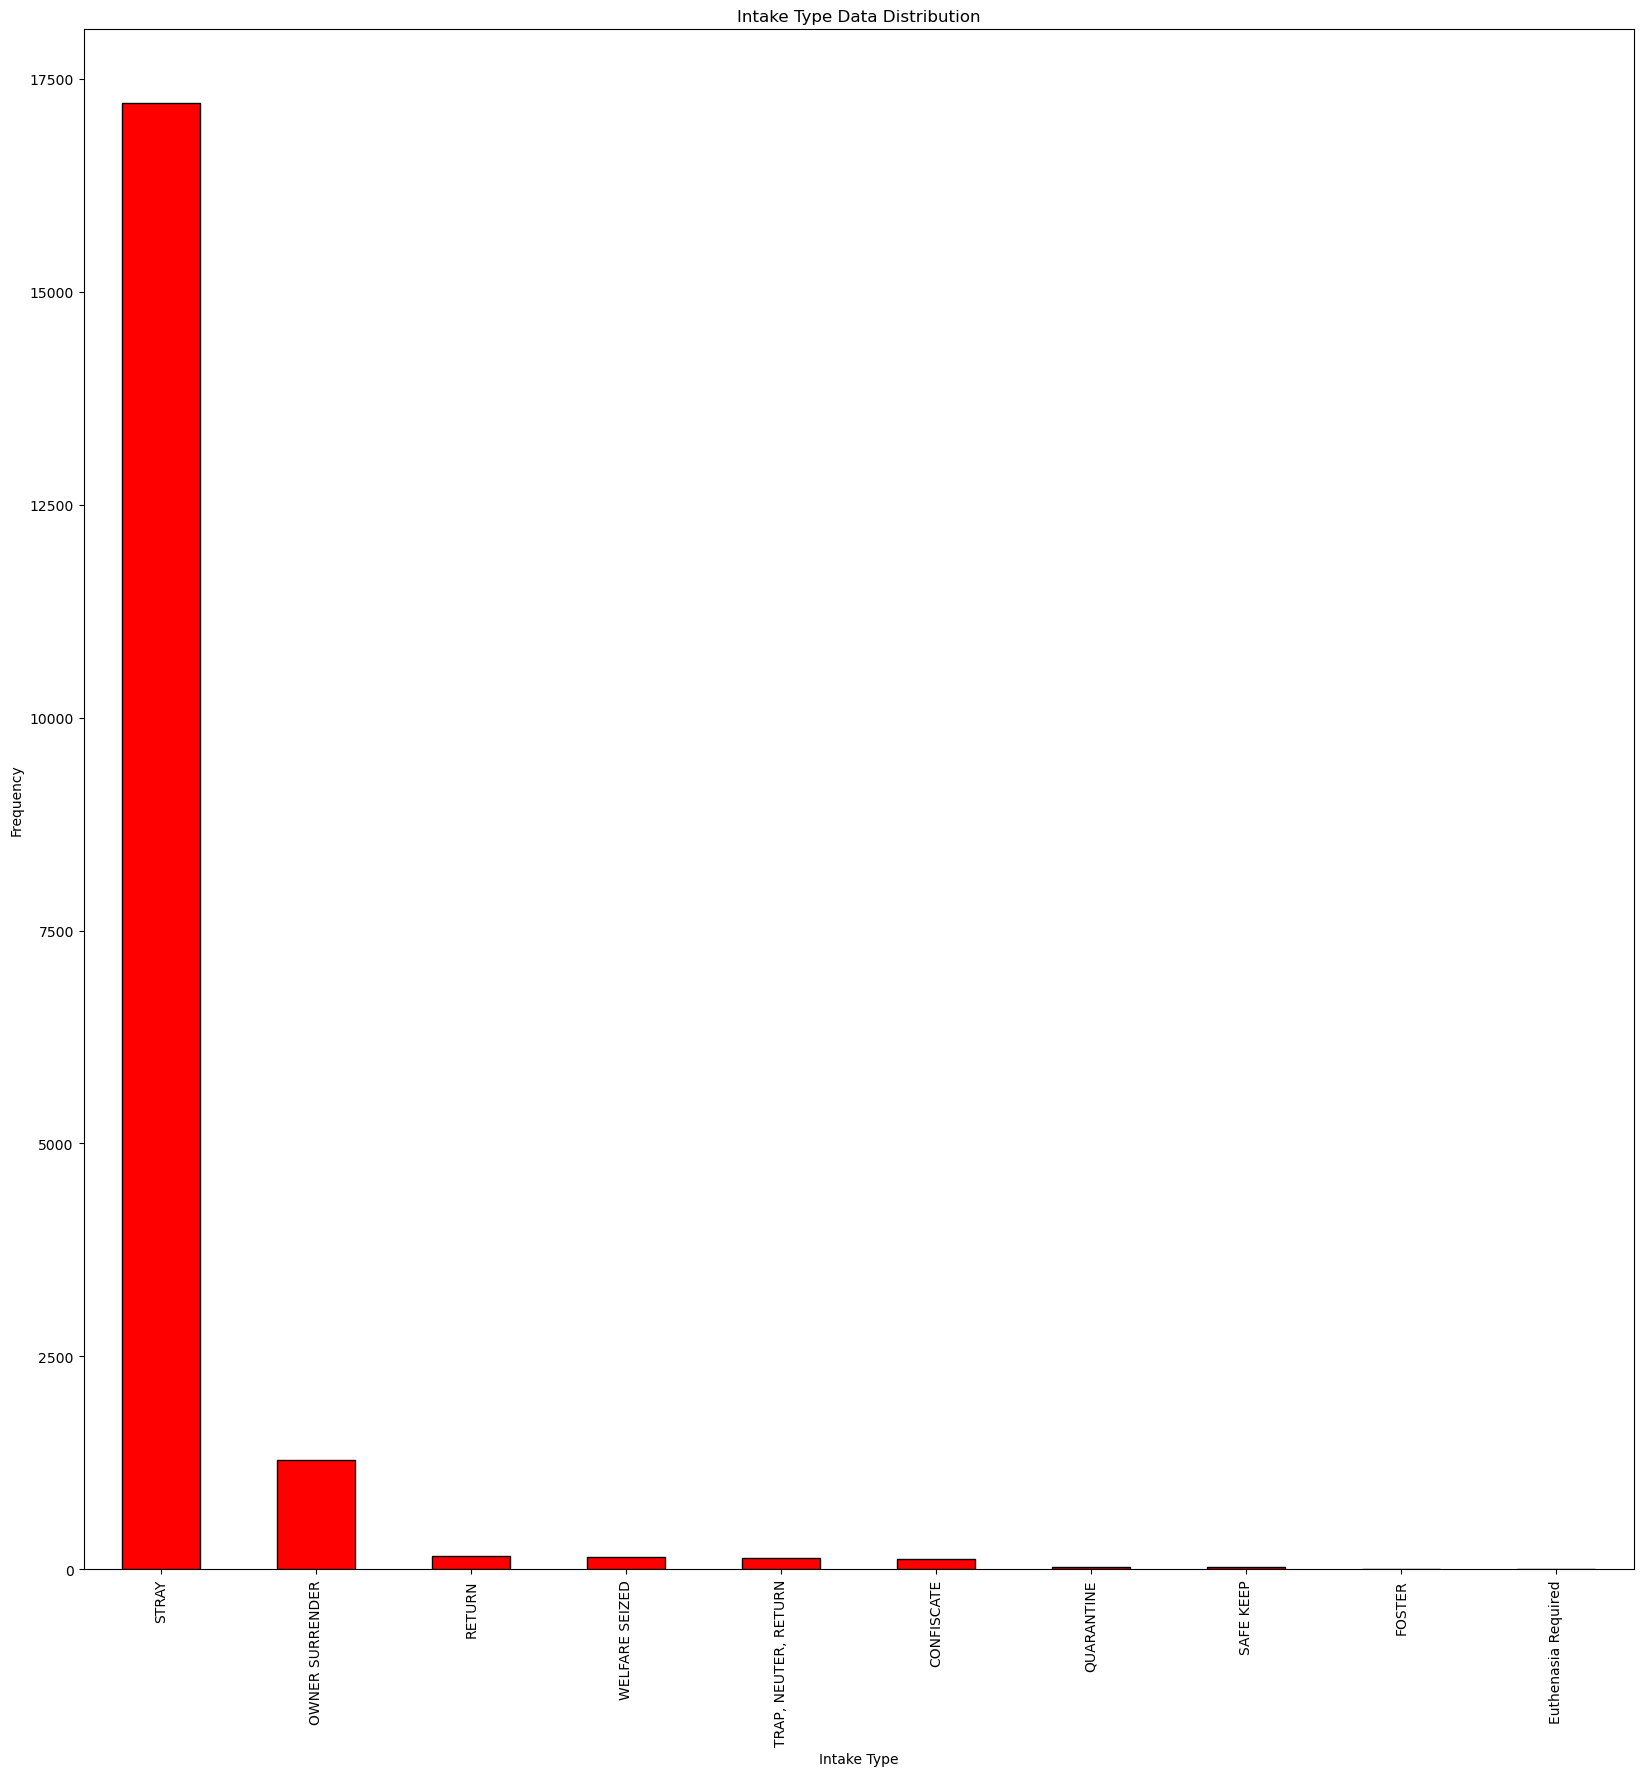

In [121]:
# ploting bar plot for Intake Type column

category_counts = selected_df['Intake_Type'].value_counts()
category_counts.plot(kind='bar', color='red', edgecolor='black', figsize= (20,20))

# Adding labels and title
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Intake Type Data Distribution')

# Display the plot
plt.show()

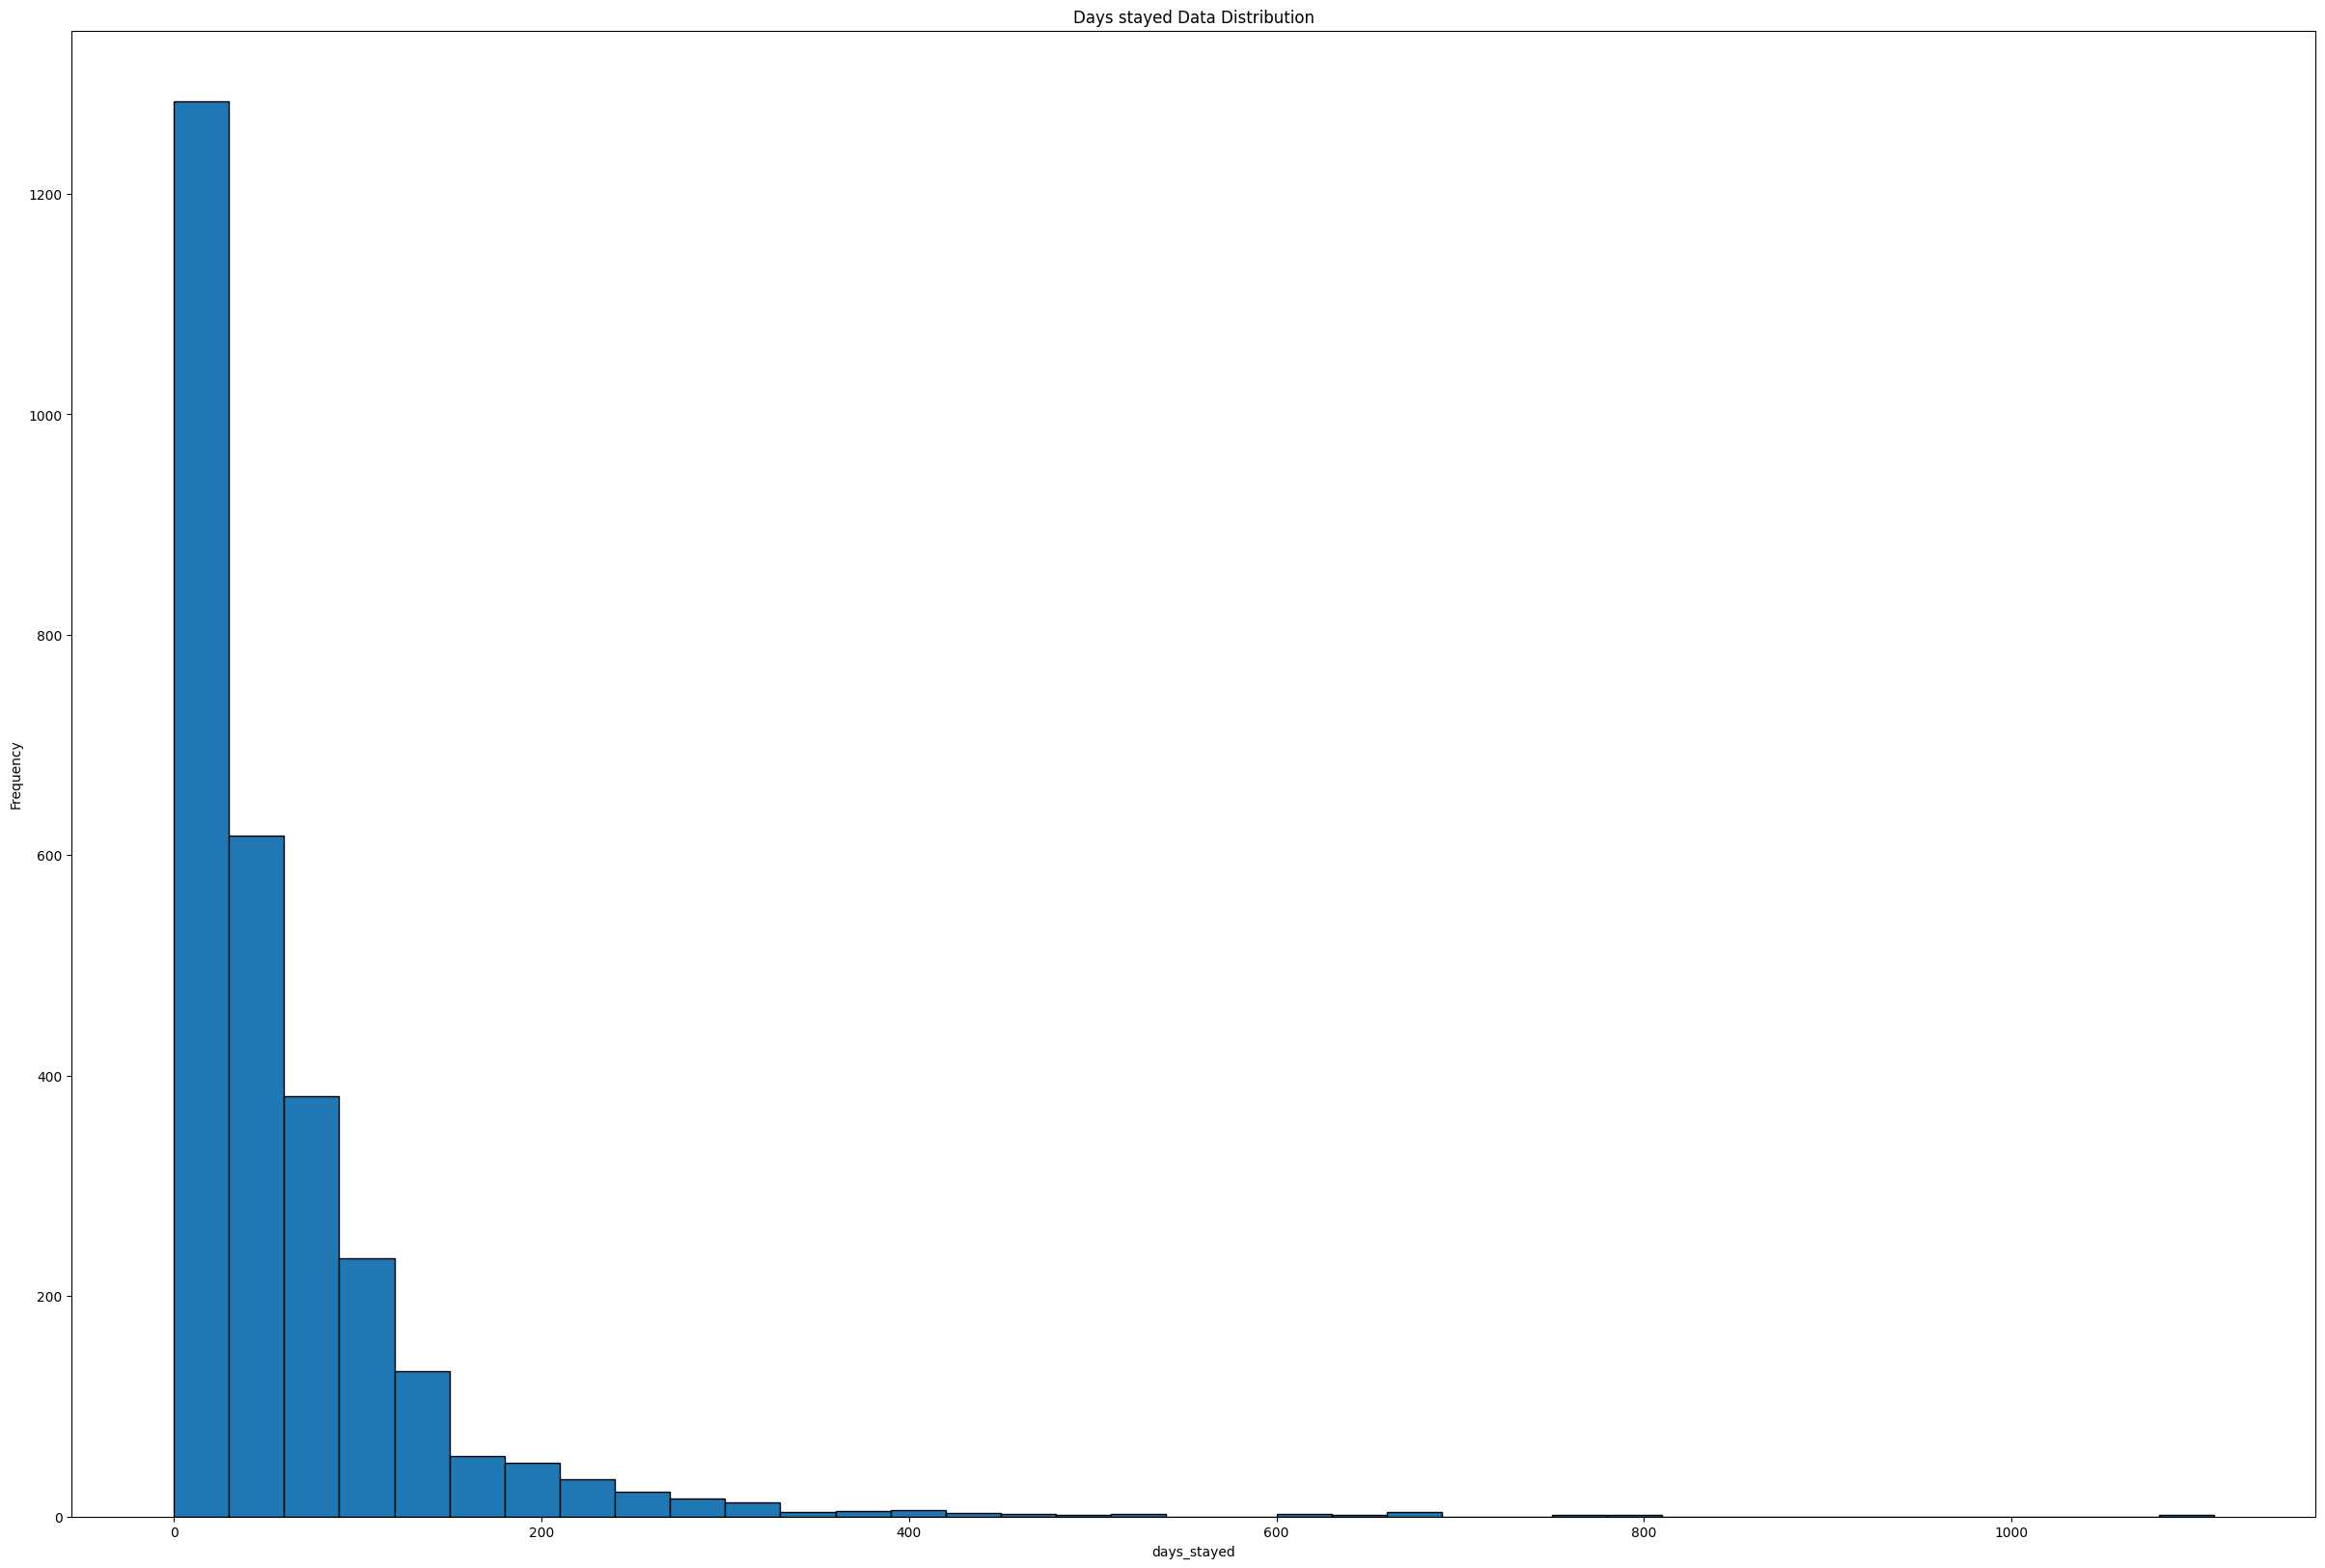

In [122]:
# ploting bar plot for days stayed column
# Calculate bin edges programmatically
bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(selected_df['days_stayed']) / bin_width) * bin_width)
max_value = int(np.ceil(max(selected_df['days_stayed']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

selected_df['days_stayed'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('days_stayed')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

**Here we see a good amount of the cat leaves shelter with in a month and most of them leaves by 6 months. But for some exceptional cases cat stays upto several years**

In [150]:
# I just got a thought we can use the year cat was taken input for visualization too
selected_df['Intake_Date'] = pd.to_datetime(selected_df['Intake_Date'], format='%m/%d/%y')
# Create a new column 'Year' with the year component
selected_df['Year'] = selected_df['Intake_Date'].dt.year
selected_df

/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_3294/2806632522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Intake_Date'] = pd.to_datetime(new_df['Intake_Date'], format='%m/%d/%y')
/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_3294/2806632522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = new_df['Intake_Date'].dt.year


,Primary_Color,Sex,Age,Intake_Date,Intake_Condition,Intake_Type,days_stayed,Year
0,BRN TABBY,Male,7,2017-01-04,INJURED SEVERE,STRAY,1,2017
1,BLACK,Female,7,2017-01-05,NORMAL,OWNER SURRENDER,1,2017
2,TORTIE,Spayed,7,2017-01-14,FERAL,STRAY,10,2017
3,GRAY,Male,6,2017-01-14,NORMAL,STRAY,1,2017
4,GRAY TABBY,Male,4,2023-01-24,ILL SEVERE,STRAY,1,2023
...,...,...,...,...,...,...,...,...
19096,BRN TABBY,Unknown,0,2023-10-21,UNDER AGE/WEIGHT,STRAY,0,2023
19097,UNKNOWN,Female,0,2023-10-18,ILL MILD,STRAY,-1,2023
19098,UNKNOWN,Male,0,2023-10-18,ILL MILD,STRAY,-1,2023
19099,ORANGE,Male,7,2023-10-20,ILL MILD,STRAY,-1,2023


### make a date timeline chart for checking cat staying over years

Text(0.5, 1.0, 'Average day_stay over time')

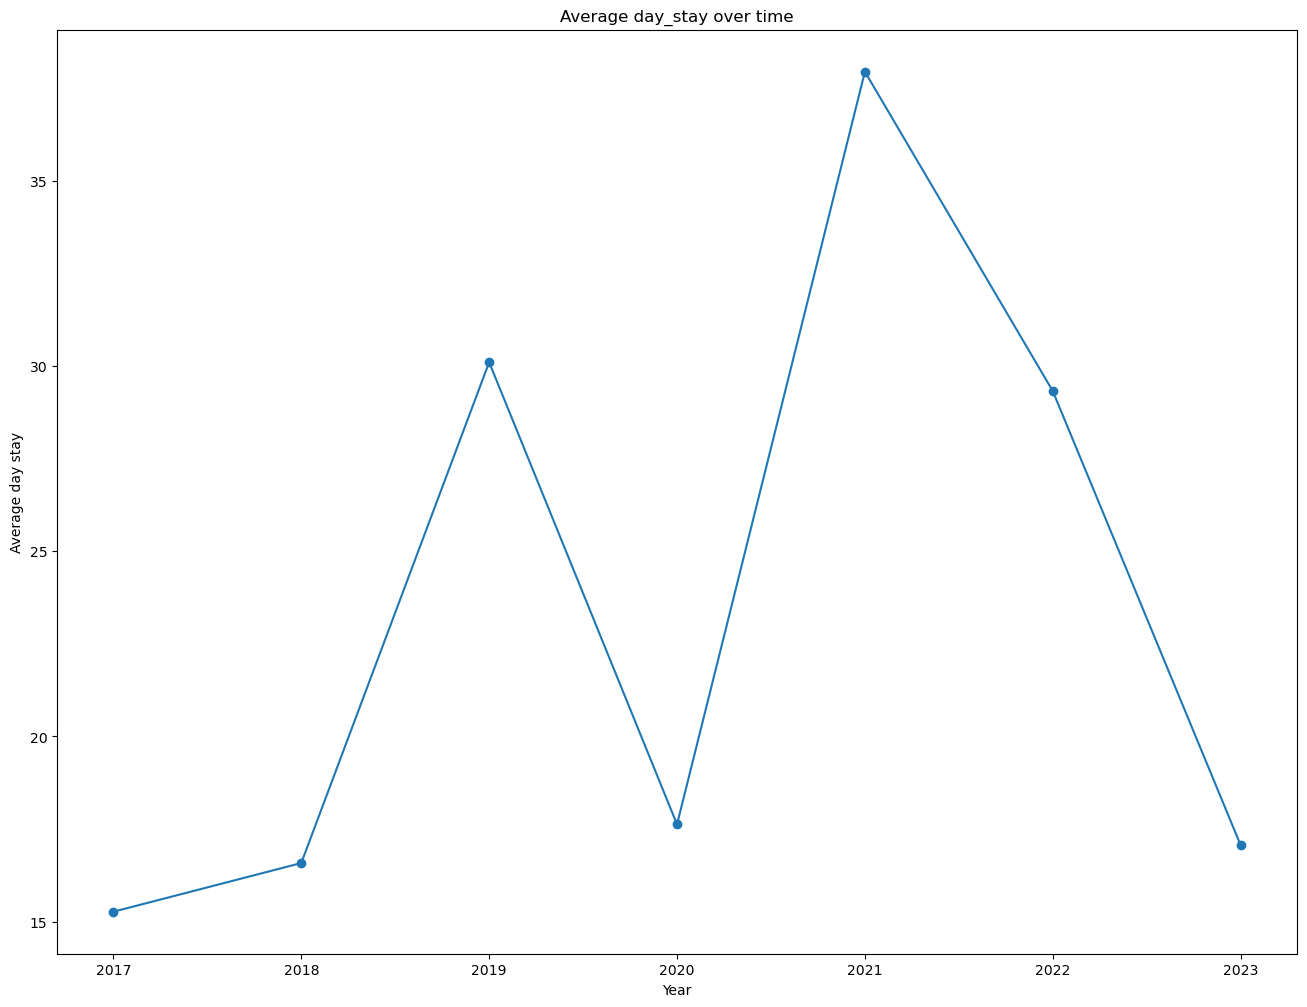

In [155]:

average_day_stay = selected_df.groupby('Year')['days_stayed'].mean()

plt.figure(figsize= (16, 12))

plt.plot(average_day_stay.index, average_day_stay.values, marker ='o', linestyle= '-')

plt.xlabel('Year')
plt.ylabel('Average day stay')
plt.title('Average day_stay over time')

**We see there was a hike in cat staying (longer stay) during 2020-2021 and drop significantly after wards. It could be because of the of the covid time and now in 2023 the staying time drop to pre-covid time again**

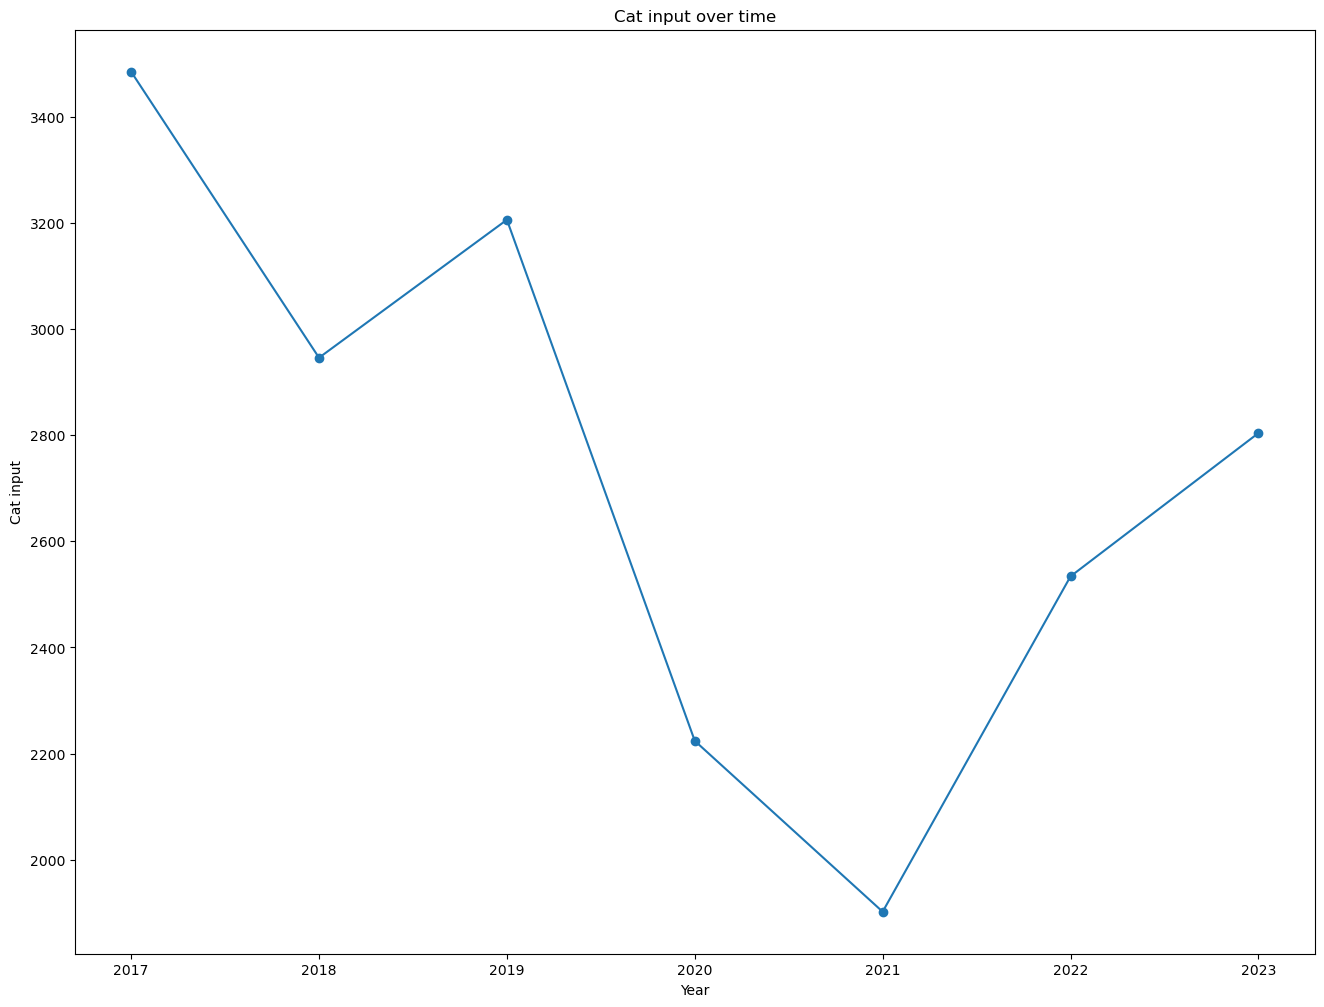

Cat input by year:
Year
2017    3485
2018    2946
2019    3206
2020    2224
2021    1902
2022    2534
2023    2804
dtype: int64


In [165]:

# Group by 'Year' and get the count of occurrences
cat_input = selected_df.groupby('Year').size()

plt.figure(figsize=(16, 12))

plt.plot(cat_input.index, cat_input.values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Cat input')
plt.title('Cat input over time')

plt.show()
print('Cat input by year:')
print(cat_input)

**From Above two time line we do see during 2020-2021 cat input was the lowest but cat stay was highest. Clearly a covid effact visible there**

# Using a pairplot, display all of the linear relationship.

/Users/ubaydulsami/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


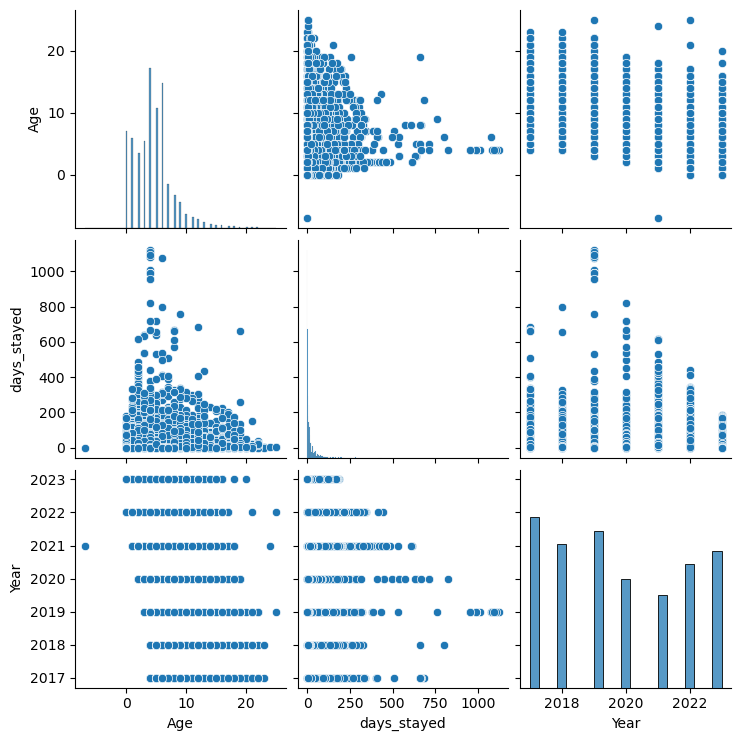

In [167]:
# Using a pairplot, display all of the linear relationship.

# setting plot size
# plt.figure(figsize=(12, 10))

sns.pairplot(selected_df)

# Show the pairplot
plt.show()

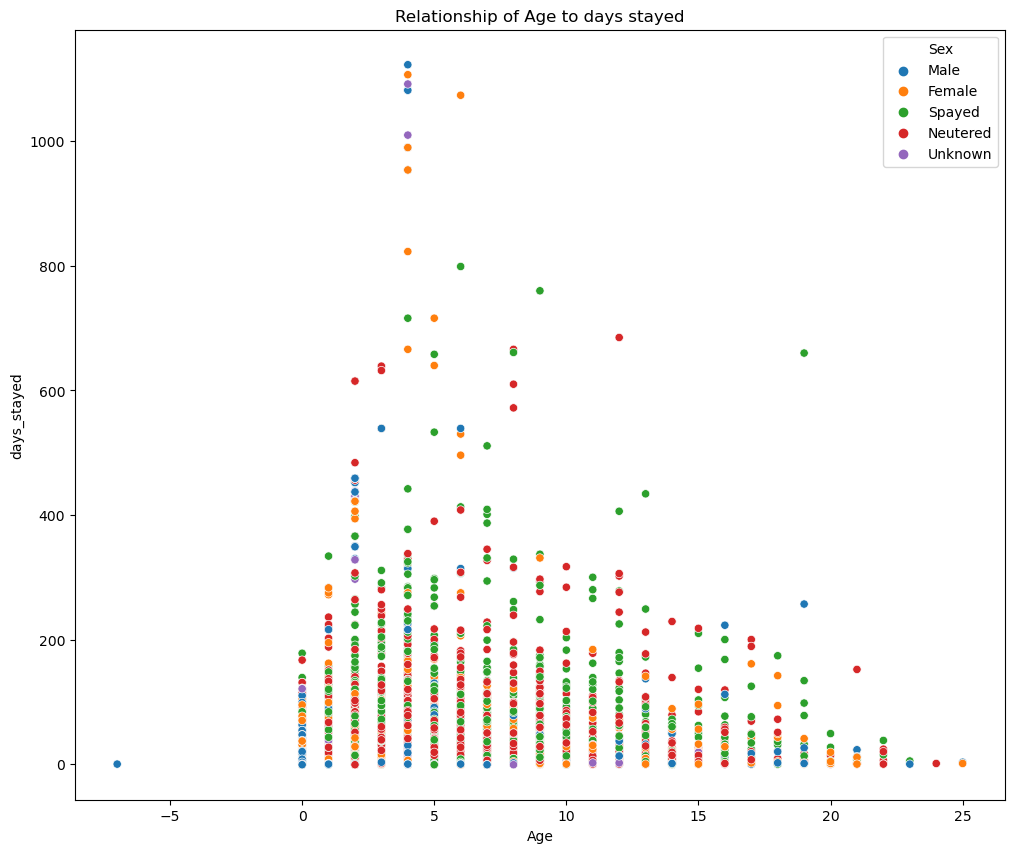

In [176]:
# Make a scatter plot of Age vs Days stay

# Setting the figure size
plt.figure(figsize=(12, 10))

relationship_age_days_stayed = sns.scatterplot(
    data=selected_df, 
    x='Age', 
    y='days_stayed',
    hue= 'Sex');

relationship_age_days_stayed.set_title("Relationship of Age to days stayed");

#showing figure
plt.show()


<Figure size 800x800 with 0 Axes>

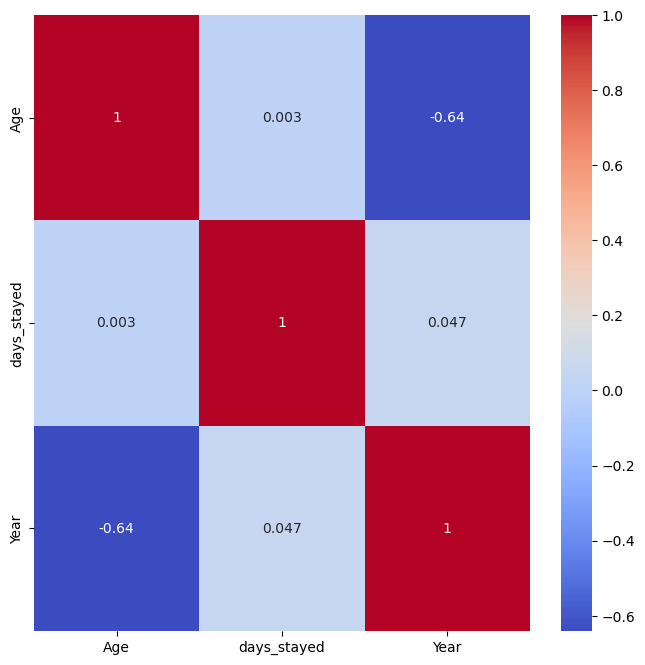

In [175]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

# setting plot size
plt.figure(figsize=(8, 8))

# sns.heatmap(selected_df.corr(), 
#             annot=True, 
#             cmap='coolwarm');

# # Show the heatmap
# plt.show()
numeric_df = selected_df.select_dtypes(include='number')

# Setting plot size
plt.figure(figsize=(8, 8))

# Create a heatmap of correlations for numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

# Show the heatmap
plt.show()

**We need to convert the other columns which has string values into binary value using "get_dummies", to find better correlations**